In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
""" 
About this file
Attribute Information:
Input variables (Feature):

Numeric:

1-Id
2-Age
3-Balance: The bank balance of the customer.
4-Day_of_Month: The day of the month on which communication took place
5-Duration: States the duration of the call (in sec) regarding the campaign. This is an important
feature as this attribute highly affects the target label (e.g., if duration=0 then y='no'). Thus, this input will be included for benchmark purposes and will be discarded if the intention is to have a realistic predictive model.
6-Num_contacts_in_campaign: Number of contacts performed during the campaign with the client for subscription
7-Days_since_prev_campaign_contact: Gap (in number of days) between two contacts
8-Num_contacts_prev_campaign: Number of contacts performed for promoting the campaign beforehand

Categorical:
9-Job_type
10-Marital: States the marital status of the customer
11-Education
12-Default: Is the customer a defaulter or not?
{'yes', 'no', 'unknown'}
13-Housing_loan: Has a housing loan or not?
14-Personal_loan: Has a personal loan or not?
15-Communication_type: Mode of communication during the campaign
16-Month: Month in which contact with the customer took place for the campaign
17-Prev_campaign_outcome: The outcome of promotional contact with the client beforehand for attending/interest in the campaign

Output variable (Label):
18-Term_deposit_subscribed: Categorical target label to be predicted {'0, '1'}
"""

" \nAbout this file\nAttribute Information:\nInput variables (Feature):\n\nNumeric:\n\n1-Id\n2-Age\n3-Balance: The bank balance of the customer.\n4-Day_of_Month: The day of the month on which communication took place\n5-Duration: States the duration of the call (in sec) regarding the campaign. This is an important\nfeature as this attribute highly affects the target label (e.g., if duration=0 then y='no'). Thus, this input will be included for benchmark purposes and will be discarded if the intention is to have a realistic predictive model.\n6-Num_contacts_in_campaign: Number of contacts performed during the campaign with the client for subscription\n7-Days_since_prev_campaign_contact: Gap (in number of days) between two contacts\n8-Num_contacts_prev_campaign: Number of contacts performed for promoting the campaign beforehand\n\nCategorical:\n9-Job_type\n10-Marital: States the marital status of the customer\n11-Education\n12-Default: Is the customer a defaulter or not?\n{'yes', 'no', '

In [74]:
path1 = 'Train.xlsx'
train_data = pd.read_excel(path1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [75]:
duplicate = train_data[train_data.duplicated(keep='first')]
print("DUPLICATE ROWS IN TRAINING DATASET:",duplicate.shape)

DUPLICATE ROWS IN TRAINING DATASET: (0, 18)


In [76]:
# GETTING THE NULL VALUES
train_data.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [77]:
# DROPPING COLUMN 'days_since_prev_campaign_contact' SINCE IT HAS 80% NULL VALUE.
train_data.drop(['days_since_prev_campaign_contact'], axis=1, inplace=True)
train_data

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,0,unknown,0


In [78]:
# GETTING NULL VALUES
train_data.isnull().sum()

id                              0
customer_age                  619
job_type                        0
marital                       150
education                       0
default                         0
balance                       399
housing_loan                    0
personal_loan                 149
communication_type              0
day_of_month                    0
month                           0
last_contact_duration         311
num_contacts_in_campaign      112
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [79]:
obj = train_data.select_dtypes(include='object')
obj.isna().sum()

id                         0
job_type                   0
marital                  150
education                  0
default                    0
housing_loan               0
personal_loan            149
communication_type         0
month                      0
prev_campaign_outcome      0
dtype: int64

In [80]:
# GETTING MODE VALUE OF MARITAL STATUS
x = train_data['marital'].mode()
x

0    married
Name: marital, dtype: object

In [81]:
# FILLING NULL VALUES WITH MODE IN marital
train_data['marital'].fillna(x[0], inplace=True)

In [82]:
# GETTING MODE VALUE OF personal_loan
x = train_data['personal_loan'].mode()
x

0    no
Name: personal_loan, dtype: object

In [83]:
# FILLING NULL VALUES WITH MODE IN personal_loan
train_data['personal_loan'].fillna(x[0], inplace=True)

In [84]:
float_cols = train_data.select_dtypes(include='float64')
float_cols.isna().sum()

customer_age                619
balance                     399
last_contact_duration       311
num_contacts_in_campaign    112
dtype: int64

c:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pedro\anaconda3\lib\si

<AxesSubplot:xlabel='last_contact_duration'>

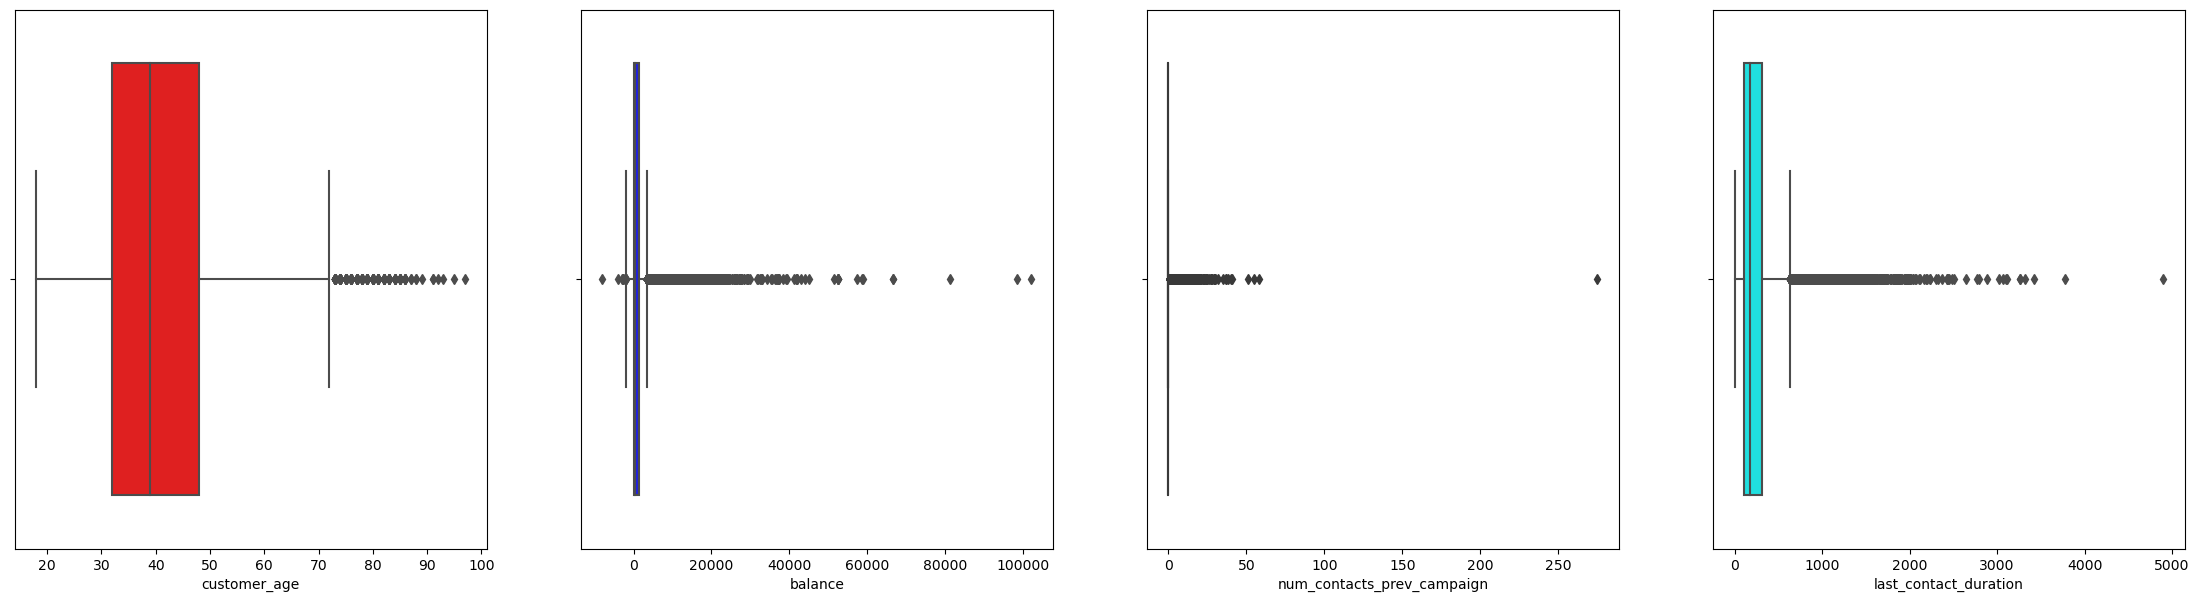

In [85]:
fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)
sns.boxplot(train_data['customer_age'], ax=axes[0], color='r')
sns.boxplot(train_data['balance'], ax=axes[1], color='b')
sns.boxplot(train_data['num_contacts_prev_campaign'], ax=axes[2], color='y')
sns.boxplot(train_data['last_contact_duration'], ax=axes[3], color='cyan')

In [86]:
Q1 = train_data.quantile(0.10)
Q3 = train_data.quantile(0.90)
IQR = Q3 - Q1

train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\pedro\AppData\Local\Temp\ipykernel_11728\381180711.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]


c:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pedro\anaconda3\lib\si

<AxesSubplot:xlabel='last_contact_duration'>

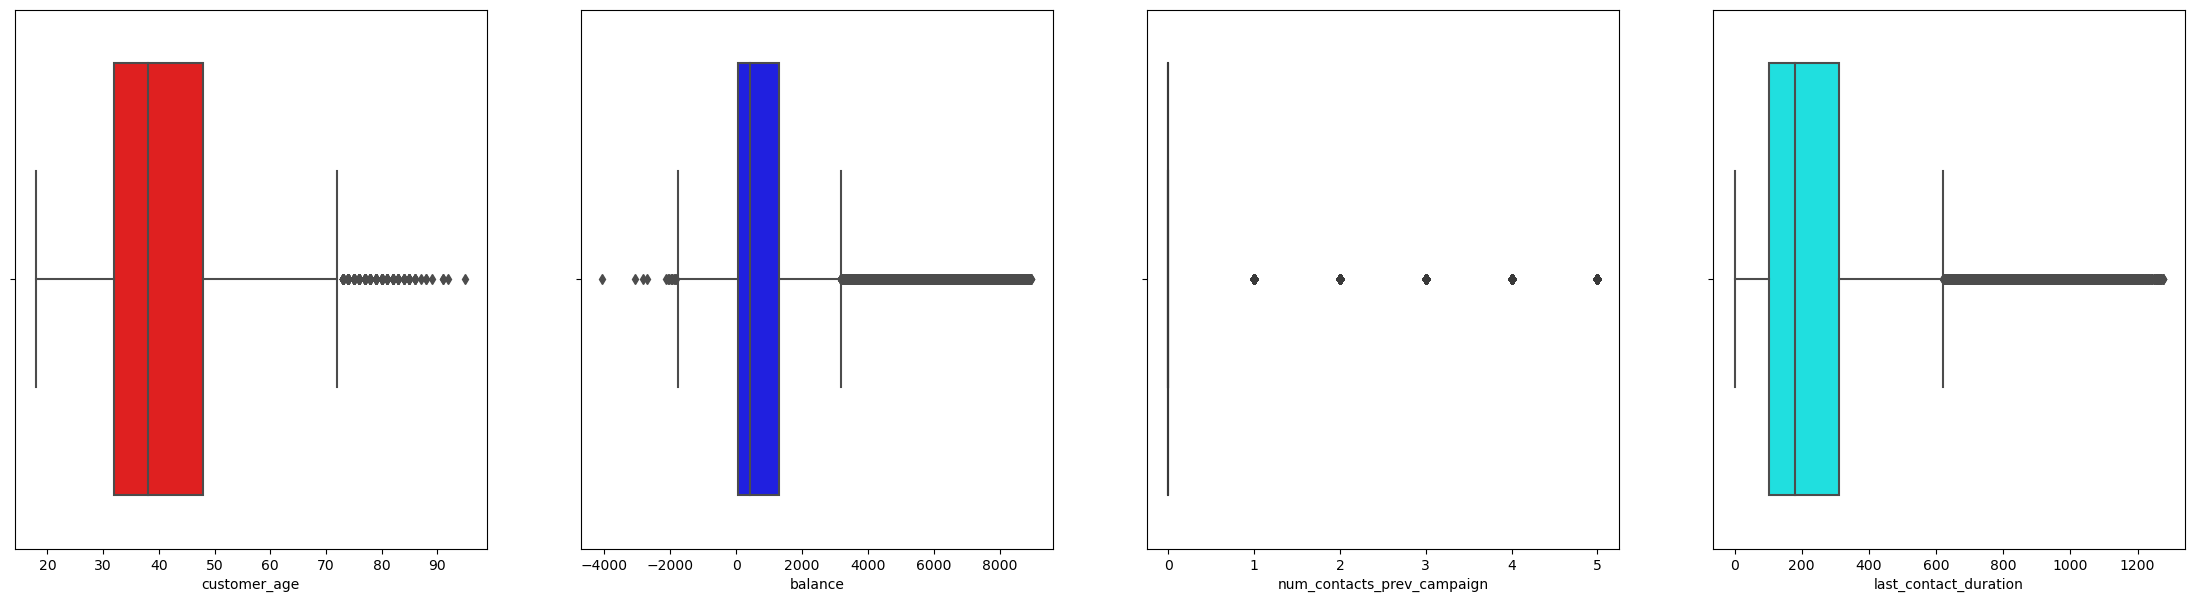

In [87]:
fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)
sns.boxplot(train_data['customer_age'], ax=axes[0], color='r')
sns.boxplot(train_data['balance'], ax=axes[1], color='b')
sns.boxplot(train_data['num_contacts_prev_campaign'], ax=axes[2], color='y')
sns.boxplot(train_data['last_contact_duration'], ax=axes[3], color='cyan')

In [88]:
# GETTING MEDIAN AGE AS AGE IS FLOATING VALUE
x = train_data['customer_age'].median()
x

38.0

In [89]:
# FILLING NULL VALUES IN customer_age COLUMN WITH MEDIAN
train_data['customer_age'].fillna(x, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_11728\3960572977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['customer_age'].fillna(x, inplace=True)


In [90]:
# GETTING MEDIAN BALANCE VALUE
x = train_data['balance'].median()
x

425.0

In [91]:
# FILLING NULL VALUES IN balance COLUMN WITH MEDIAN
train_data['balance'].fillna(x, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_11728\4111919473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['balance'].fillna(x, inplace=True)


In [92]:
# GETTING MEDIAN VALUE OF last_call_duration COLUMN
x = train_data['last_contact_duration'].median()
x

180.0

In [93]:
# FILLING NULL VALUES IN last_contact_duration COLUMN WITH MEDIAN
train_data['last_contact_duration'].fillna(x, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_11728\469373568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['last_contact_duration'].fillna(x, inplace=True)


In [94]:
# GETTING MEDIAN VALUE OF num_contact_in_campaign COLUMN
x = train_data['num_contacts_in_campaign'].median()
x

2.0

In [95]:
# FILLING NULL VALUES IN num_contacts_in_campaign COLUMN WITH MEDIAN AS MEAN VALUE CAN BE INFLUENCED BY OUTLIER, BUT MEDIAN WILL NOT
train_data['num_contacts_in_campaign'].fillna(x, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_11728\689110007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['num_contacts_in_campaign'].fillna(x, inplace=True)


In [96]:
train_data.isnull().sum()

id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [98]:
# create the mid_month column
train_data['mid_month'] = train_data['day_of_month'].apply(lambda x: 1 if x > 15 else 0)

# delete the day_of_month column
train_data.drop('day_of_month', axis=1, inplace=True)

train_data

C:\Users\pedro\AppData\Local\Temp\ipykernel_11728\2723971600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['mid_month'] = train_data.loc[:, 'day_of_month'].apply(lambda x: 1 if x > 15 else 0)


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,mid_month
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0,1
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0,1
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0,1
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,3,other,0,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0,unknown,0,1
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0,unknown,0,1
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,0,unknown,0,0
